**Astro89 Final Project:** Simulating the Rocket Equation

Concepts/Testing

In [ ]:
#Thoughts
#To be more thorough we simulate do both the rocket equation
# and the rocket equation with friction and gravity.

#Main Planning
#Main question is what we want to plot?
# - Height of rocket vs. time
# - Velocity of rocket vs. time
# - Maximum velocity vs. change in fuel mass
# - Momentum or impulse vs. time (to demonstrate conservation)
# - Thrust and/or drag vs. time
# - Constant gravity or changing gravity with height
# There are a lot of ways we could take this because we can 
# numerically solve the diff. eq.s for positions


#Packages
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy import units as u
from astropy import constants as c
import scipy.integrate as integrate
import random, decimal

Initial Constants

In [ ]:
#Constants
#mass of rocket #kg
#inintial mass of fuel tank #kg
#inital/final velocity #km/s
#drag/friction coefficient

y0=0 #m, initial position
g=-9.8 #m/s^2 acceleration due to gravity
m0 = 1000000 #kg, initial mass of rocket plus initial mass of fuel
v_exh = 1 #km/s, arbitrary minimum to show basic relation;
# Typical values are between 1.7 and 2.9 km/s for liquid monopropellants
# Typical values are between 2.1 and 3.2 km/s for solid propellants
# Typical values are between 2.9 and 4.5 km/s for liquid bipropellants
#v_exh = Isp*g where Isp is the specific impulse

Solving for Delta-V Exactly

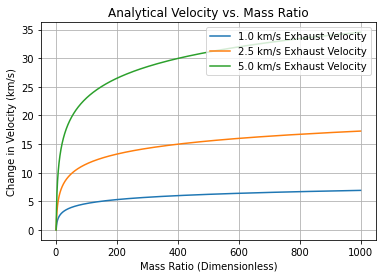

In [ ]:
#From formula in LaTeX report
# set Sum(F) = m * (dv/dt) - (dv_exh/dt) = 0 and solve

# We can actually solve this exactly for delta_v
# when there are no external forces acting on the rocket
# delta_v = v_exh*np.log(m_i/m_f)

# Initialize constants
g = -9.8/1000 #km/s^2 acceleration due to gravity
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s

# Now we have delta_v as a function of the mass ratio
def delta_v(m0,mf,v_exh):
  return v_exh*np.log(m0/mf) # We can check this by solving homogeneous RE

# m0 defined above, so we choose mf such that ratios go from 1 to 1000
mfs = np.linspace(m0, m0/1000,10000)
delta_vs = delta_v(m0, mfs, v_exh)
# And we can also compare varying the exhaust velocities
v_exh2 = 2.5 #km/s
delta_vs2 = delta_v(m0, mfs, v_exh2)
v_exh3 = 5 #km/s
delta_vs3 = delta_v(m0, mfs, v_exh3)

# And then plot to compare
plt.figure()
plt.plot(m0/mfs,delta_vs, label = '{0:2.1f} km/s Exhaust Velocity'.format(v_exh))
plt.plot(m0/mfs,delta_vs2, label = '{0:2.1f} km/s Exhaust Velocity'.format(v_exh2))
plt.plot(m0/mfs,delta_vs3, label = '{0:2.1f} km/s Exhaust Velocity'.format(v_exh3))
plt.title("Analytical Velocity vs. Mass Ratio")
plt.xlabel("Mass Ratio (Dimensionless)")
plt.ylabel("Change in Velocity (km/s)")
plt.legend()
plt.grid()
plt.show()

No External Forces Rocket Equation - Homogeneous RE

In [ ]:
#Set sum(F) = m(t) * (dv/dt) + v_exh * (dm/dt) = 0
# This is just a rocket accelerating with no opposing forces
# We solved this exactly above as a function of the mass ratios
# however, we can also solve this equation for the velocity and
# position as functions of time
# -> dv/dt = - v_exh * (dm/dt) / m(t)

# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s, range of liquid monopropellants
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s, range of solid propellants
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s, range of liquid bipropellants
v_exh5 = 10 #km/s, some arbitrarily bigger velocity

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 
# Go just until were almost out of fuel and have enough steps for good resolution

# We can define m(t) in a variety of ways, corresponding to different fuel ejection rates. 
def m(t): # Linear expulsion of fuel so mass decreases with time
  return m0 - dm * t

def dmdt(t): # Manually take the derivative
  return -dm

# v_exh = 1 km/s
def RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = - v_exh * dmdt(t) / m(t)
  return [dydt,dvdt]

Y0 = [0,0] # Initial points of zero height and zero velocity
REsol = integrate.odeint(RE, Y0, t)

# v_exh2 = [1.7, 2.9] km/s
def RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = - (v_exh2 * dmdt(t)) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
REsol2 = integrate.odeint(RE2, Y0, t)

# v_exh3 = [2.1, 3.2] km/s
def RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = - (v_exh3 * dmdt(t)) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
REsol3 = integrate.odeint(RE3, Y0, t)

# v_exh4 = [2.9, 4.5] km/s
def RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = - (v_exh4 * dmdt(t)) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
REsol4 = integrate.odeint(RE4, Y0, t)

# v_exh5 = 10 km/s
def RE5(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = - (v_exh5 * dmdt(t)) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
REsol5 = integrate.odeint(RE5, Y0, t)

Plotting Homogeneous RE

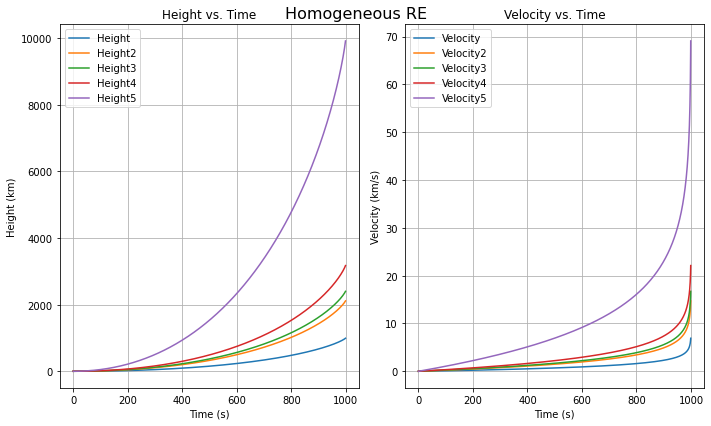

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Homogeneous RE", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, REsol[:,0], label = 'Height') # Uses all solved values for height, i.e. first column values y = Y[0]
ax0.plot(t, REsol2[:,0], label = 'Height2')
ax0.plot(t, REsol3[:,0], label = 'Height3')
ax0.plot(t, REsol4[:,0], label = 'Height4')
ax0.plot(t, REsol5[:,0], label = 'Height5')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, REsol[:,1], label = 'Velocity') # Uses all solved values for velocity, i.e. second column values v = Y[1]
ax1.plot(t, REsol2[:,1], label = 'Velocity2')
ax1.plot(t, REsol3[:,1], label = 'Velocity3')
ax1.plot(t, REsol4[:,1], label = 'Velocity4')
ax1.plot(t, REsol5[:,1], label = 'Velocity5')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

Gravity Dependent Rocket Equation

In [ ]:
#Set sum(F) = m(t) * (dv/dt) + v_exh * (dm/dt) = -m(t)*g
# This is just gravity acting against the rocket gaining height.
# -> dv/dt = -(v_exh * dm/dt + m(t)*g)/m(t) = - (v_exh * dm/dt / m(t) + g)

# Initialize constants
g=-9.8/1000 #km/s^2 acceleration due to gravity
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s
v_exh5 = 10 #km/s

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 
# Go just until were almost out of fuel and have enough steps for good resolution

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

def g_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -(v_exh * dmdt(t) + g) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Gsol = integrate.odeint(g_RE, Y0, t)

# v_exh2
def g_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -(v_exh2 * dmdt(t) + g) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Gsol2 = integrate.odeint(g_RE2, Y0, t)

# v_exh3
def g_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -(v_exh3 * dmdt(t) + g) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Gsol3 = integrate.odeint(g_RE3, Y0, t)

# v_exh4
def g_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -(v_exh4 * dmdt(t) + g) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Gsol4 = integrate.odeint(g_RE4, Y0, t)

# v_exh5
def g_RE5(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -(v_exh5 * dmdt(t) + g) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Gsol5 = integrate.odeint(g_RE5, Y0, t)

Plotting Gravity Dep. RE

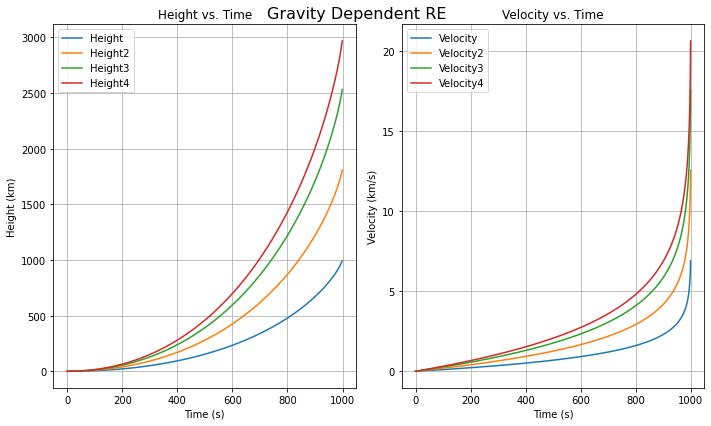

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Gravity Dependent RE", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, Gsol[:,0], label = 'Height')
ax0.plot(t, Gsol2[:,0], label = 'Height2')
ax0.plot(t, Gsol3[:,0], label = 'Height3')
ax0.plot(t, Gsol4[:,0], label = 'Height4')
#ax0.plot(t, Gsol5[:,0], label = 'Height5')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, Gsol[:,1], label = 'Velocity')
ax1.plot(t, Gsol2[:,1], label = 'Velocity2')
ax1.plot(t, Gsol3[:,1], label = 'Velocity3')
ax1.plot(t, Gsol4[:,1], label = 'Velocity4')
#ax1.plot(t, Gsol5[:,1], label = 'Velocity5')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

Friction Dependent Rocket Equation

In [ ]:
#Set sum(F) = m(t) * (dv/dt) + v_exh * (dm/dt) = -b*v(t)**2
# This is standard air friction/drag approximation acting against the rocket gaining height, where b is a constant.
# drag F = 0.5 * C_d * rho * A * v**2 = b * v**2
# b*v(t)**2 =~ 0.75 for model rockets
# -> dv/dt = -(v_exh * dm/dt + m(t)*g)/m(t) = - v_exh * dm/dt / m(t) - b*v(t)**2 / m(t)

# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s
v_exh5 = 10 #km/s
b = 25 #friction coefficient value, dimensionless; below examples will vary b
# larger values of b are more realistic as b is proptional to the rocket's area, 
# but not larger than homogeneous sum(F)

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

# v_exh
def b_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol = integrate.odeint(b_RE, Y0, t)

# v_exh2
def b_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh2 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol2 = integrate.odeint(b_RE2, Y0, t)

# v_exh3
def b_RE3(Y, t):

  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh3 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol3 = integrate.odeint(b_RE3, Y0, t)

# v_exh4
def b_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh4 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol4 = integrate.odeint(b_RE4, Y0, t)


# Note: not noticably different for b < 10

Plotting Friction Dep. RE

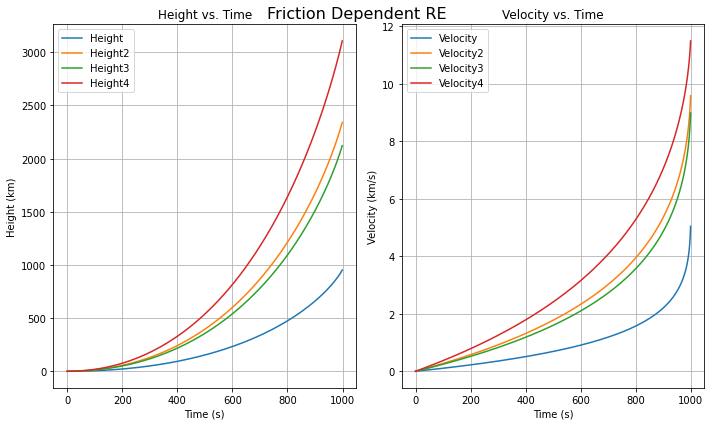

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Friction Dependent RE", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, Bsol[:,0], label = 'Height')
ax0.plot(t, Bsol2[:,0], label = 'Height2')
ax0.plot(t, Bsol3[:,0], label = 'Height3')
ax0.plot(t, Bsol4[:,0], label = 'Height4')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, Bsol[:,1], label = 'Velocity')
ax1.plot(t, Bsol2[:,1], label = 'Velocity2')
ax1.plot(t, Bsol3[:,1], label = 'Velocity3')
ax1.plot(t, Bsol4[:,1], label = 'Velocity4')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

Friction Dep. RE: b = 0.75

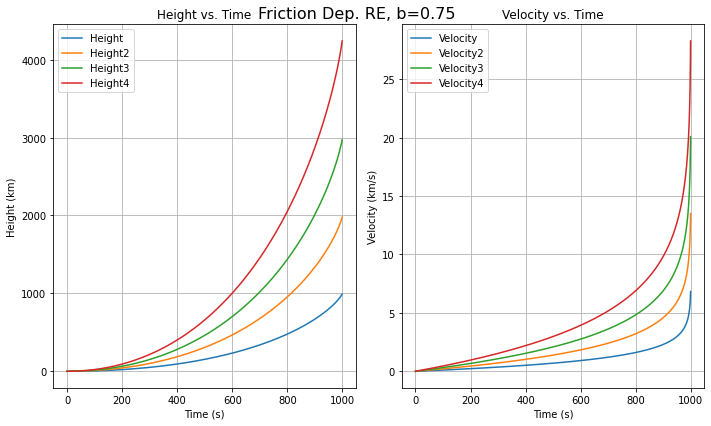

In [ ]:
# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s
v_exh5 = 10 #km/s
b = 0.75 #friction coefficient

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

# v_exh
def b_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol = integrate.odeint(b_RE, Y0, t)

# v_exh2
def b_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh2 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol2 = integrate.odeint(b_RE2, Y0, t)

# v_exh3
def b_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh3 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol3 = integrate.odeint(b_RE3, Y0, t)

# v_exh4
def b_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh4 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol4 = integrate.odeint(b_RE4, Y0, t)


# Plotting b = 0.75
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Friction Dep. RE, b=0.75", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, Bsol[:,0], label = 'Height')
ax0.plot(t, Bsol2[:,0], label = 'Height2')
ax0.plot(t, Bsol3[:,0], label = 'Height3')
ax0.plot(t, Bsol4[:,0], label = 'Height4')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, Bsol[:,1], label = 'Velocity')
ax1.plot(t, Bsol2[:,1], label = 'Velocity2')
ax1.plot(t, Bsol3[:,1], label = 'Velocity3')
ax1.plot(t, Bsol4[:,1], label = 'Velocity4')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

Friction Dep. RE: b = 50

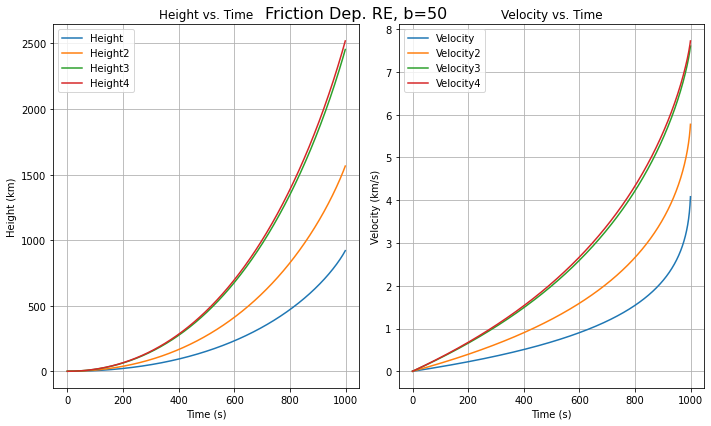

In [ ]:
# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s
b = 50 #friction coefficient

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 
 
def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

def b_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol = integrate.odeint(b_RE, Y0, t)

# v_exh2
def b_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh2 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol2 = integrate.odeint(b_RE2, Y0, t)

# v_exh3
def b_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh3 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol3 = integrate.odeint(b_RE3, Y0, t)

# v_exh4
def b_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh4 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol4 = integrate.odeint(b_RE4, Y0, t)


# Plotting b = 50
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Friction Dep. RE, b=50", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, Bsol[:,0], label = 'Height')
ax0.plot(t, Bsol2[:,0], label = 'Height2')
ax0.plot(t, Bsol3[:,0], label = 'Height3')
ax0.plot(t, Bsol4[:,0], label = 'Height4')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, Bsol[:,1], label = 'Velocity')
ax1.plot(t, Bsol2[:,1], label = 'Velocity2')
ax1.plot(t, Bsol3[:,1], label = 'Velocity3')
ax1.plot(t, Bsol4[:,1], label = 'Velocity4')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

Friction Dep. RE: b = 200

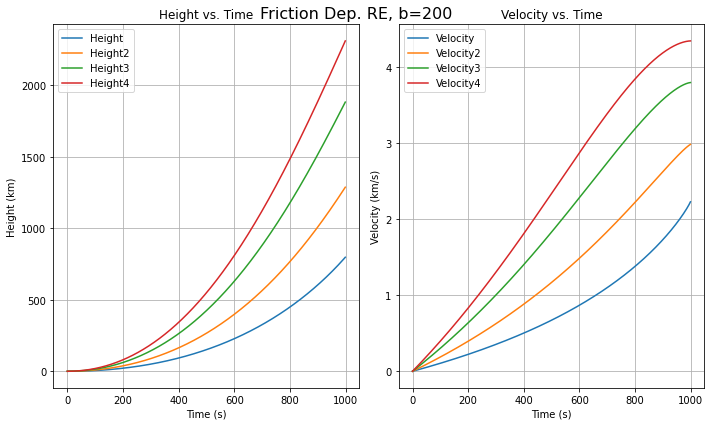

In [ ]:
# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s
b = 200 #friction coefficient

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

def b_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol = integrate.odeint(b_RE, Y0, t)

# v_exh2
def b_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh2 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol2 = integrate.odeint(b_RE2, Y0, t)

# v_exh3
def b_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh3 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol3 = integrate.odeint(b_RE3, Y0, t)

# v_exh4
def b_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh4 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol4 = integrate.odeint(b_RE4, Y0, t)


# Plotting b = 200
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Friction Dep. RE, b=200", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, Bsol[:,0], label = 'Height')
ax0.plot(t, Bsol2[:,0], label = 'Height2')
ax0.plot(t, Bsol3[:,0], label = 'Height3')
ax0.plot(t, Bsol4[:,0], label = 'Height4')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, Bsol[:,1], label = 'Velocity')
ax1.plot(t, Bsol2[:,1], label = 'Velocity2')
ax1.plot(t, Bsol3[:,1], label = 'Velocity3')
ax1.plot(t, Bsol4[:,1], label = 'Velocity4')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

Friction Dep. RE: b = 1000

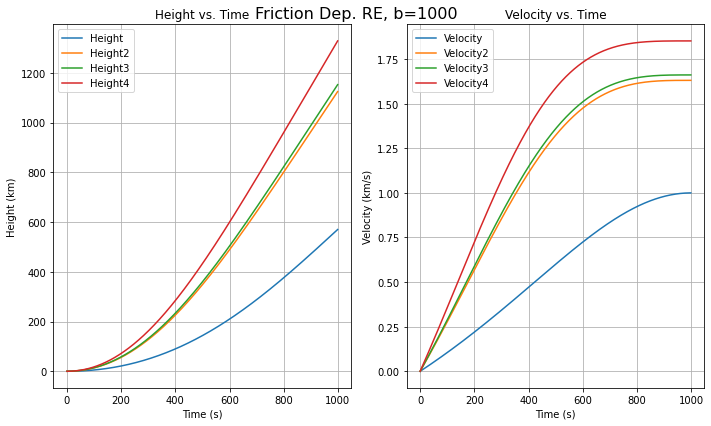

In [ ]:
# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s
b = 1000 #friction coefficient

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

def b_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol = integrate.odeint(b_RE, Y0, t)

# v_exh2
def b_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh2 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol2 = integrate.odeint(b_RE2, Y0, t)

# v_exh3
def b_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh3 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol3 = integrate.odeint(b_RE3, Y0, t)

# v_exh4
def b_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -( (v_exh4 * dmdt(t) ) + (b * dydt**2 ) ) / m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Bsol4 = integrate.odeint(b_RE4, Y0, t)


# Plotting b = 1000
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Friction Dep. RE, b=1000", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, Bsol[:,0], label = 'Height')
ax0.plot(t, Bsol2[:,0], label = 'Height2')
ax0.plot(t, Bsol3[:,0], label = 'Height3')
ax0.plot(t, Bsol4[:,0], label = 'Height4')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, Bsol[:,1], label = 'Velocity')
ax1.plot(t, Bsol2[:,1], label = 'Velocity2')
ax1.plot(t, Bsol3[:,1], label = 'Velocity3')
ax1.plot(t, Bsol4[:,1], label = 'Velocity4')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

External Force Cases: RE with Gravity and Friction

Both Cases: b = 50

In [ ]:
#Set sum(F) = m(t)*(dv/dt) + v_exh*(dm/dt) = -m(t)*g - b*v(t)**2
# RE incorporating both gravity and air resistance
# -> dv/dt = -(v_exh * dm/dt + m(t)*g)/m(t) = - v_exh * dm/dt / m(t) - g - b*v(t)**2 / m(t)

# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
v_exh2 = float(decimal.Decimal(random.randrange(170, 290))/100) #km/s
v_exh3 = float(decimal.Decimal(random.randrange(210, 320))/100) #km/s
v_exh4 = float(decimal.Decimal(random.randrange(290, 450))/100) #km/s

g=-9.8/1000 #km/s^2 acceleration due to gravity
b = 50 #friction coefficient 

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

# v_exh
def full_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol = integrate.odeint(full_RE, Y0, t)

# v_exh2
def full_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh2 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol2 = integrate.odeint(full_RE2, Y0, t)

# v_exh3
def full_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh3 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol3 = integrate.odeint(full_RE3, Y0, t)

# v_exh4
def full_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh4 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol4 = integrate.odeint(full_RE4, Y0, t)

Plotting Both Cases

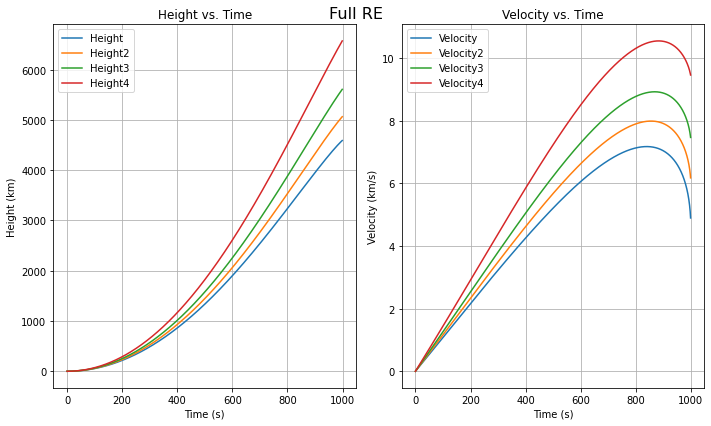

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("Full RE", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, Fsol[:,0], label = 'Height')
ax0.plot(t, Fsol2[:,0], label = 'Height2')
ax0.plot(t, Fsol3[:,0], label = 'Height3')
ax0.plot(t, Fsol4[:,0], label = 'Height4')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, Fsol[:,1], label = 'Velocity')
ax1.plot(t, Fsol2[:,1], label = 'Velocity2')
ax1.plot(t, Fsol3[:,1], label = 'Velocity3')
ax1.plot(t, Fsol4[:,1], label = 'Velocity4')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

Comparing All Cases: Homogeneous, Gravity, Friction, and Full RE

All RE Comparison: b = 25

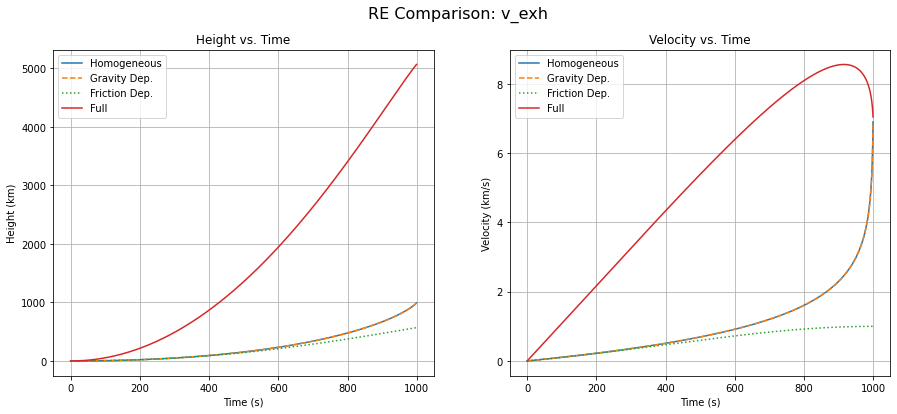

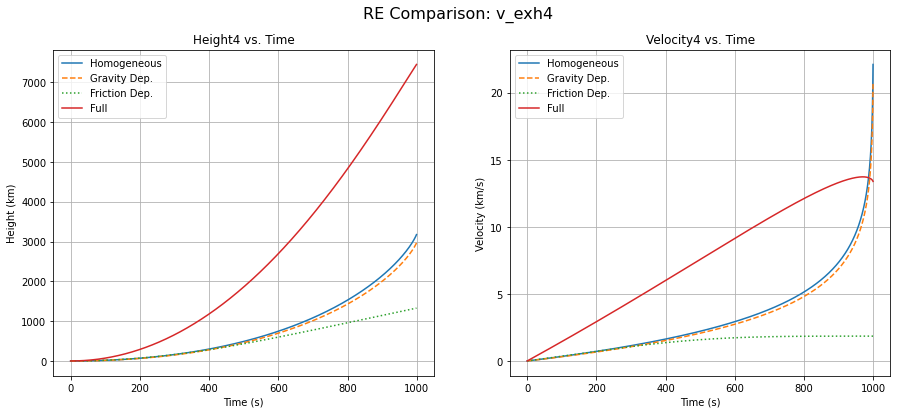

In [ ]:
b=25
# v_exh

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

# v_exh
def full_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol = integrate.odeint(full_RE, Y0, t)

# v_exh2
def full_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh2 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol2 = integrate.odeint(full_RE2, Y0, t)

# v_exh3
def full_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh3 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol3 = integrate.odeint(full_RE3, Y0, t)

# v_exh4
def full_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh4 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol4 = integrate.odeint(full_RE4, Y0, t)

#Big Plot
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, REsol[:,0], label = 'Homogeneous')
ax0.plot(t, Gsol[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax0.plot(t, Bsol[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax0.plot(t, Fsol[:,0], label = 'Full')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, REsol[:,1], label = 'Homogeneous')
ax1.plot(t, Gsol[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax1.plot(t, Bsol[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax1.plot(t, Fsol[:,1], label = 'Full')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

# v_exh2
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh2", fontsize = 16)

ax2,ax3 = axes[0],axes[1]

ax2.plot(t, REsol2[:,0], label = 'Homogeneous')
ax2.plot(t, Gsol2[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax2.plot(t, Bsol2[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax2.plot(t, Fsol2[:,0], label = 'Full')
ax2.set_title("Height2 vs. Time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Height (km)")
ax2.legend()
ax2.grid()

ax3.plot(t, REsol2[:,1], label = 'Homogeneous')
ax3.plot(t, Gsol2[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax3.plot(t, Bsol2[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax3.plot(t, Fsol2[:,1], label = 'Full')
ax3.set_title("Velocity2 vs. Time")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Velocity (km/s)")
ax3.legend()
ax3.grid()

# v_exh3
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh3", fontsize = 16)

ax4,ax5 = axes[0],axes[1]

ax4.plot(t, REsol3[:,0], label = 'Homogeneous')
ax4.plot(t, Gsol3[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax4.plot(t, Bsol3[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax4.plot(t, Fsol3[:,0], label = 'Full')
ax4.set_title("Height3 vs. Time")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Height (km)")
ax4.legend()
ax4.grid()

ax5.plot(t, REsol3[:,1], label = 'Homogeneous')
ax5.plot(t, Gsol3[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax5.plot(t, Bsol3[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax5.plot(t, Fsol3[:,1], label = 'Full')
ax5.set_title("Velocity3 vs. Time")
ax5.set_xlabel("Time (s)")
ax5.set_ylabel("Velocity (km/s)")
ax5.legend()
ax5.grid()

# v_exh4
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh4", fontsize = 16)

ax6,ax7 = axes[0],axes[1]

ax6.plot(t, REsol4[:,0], label = 'Homogeneous')
ax6.plot(t, Gsol4[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax6.plot(t, Bsol4[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax6.plot(t, Fsol4[:,0], label = 'Full')
ax6.set_title("Height4 vs. Time")
ax6.set_xlabel("Time (s)")
ax6.set_ylabel("Height (km)")
ax6.legend()
ax6.grid()

ax7.plot(t, REsol4[:,1], label = 'Homogeneous')
ax7.plot(t, Gsol4[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax7.plot(t, Bsol4[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax7.plot(t, Fsol4[:,1], label = 'Full')
ax7.set_title("Velocity4 vs. Time")
ax7.set_xlabel("Time (s)")
ax7.set_ylabel("Velocity (km/s)")
ax7.legend()
ax7.grid()

All RE Comparison: b = 50

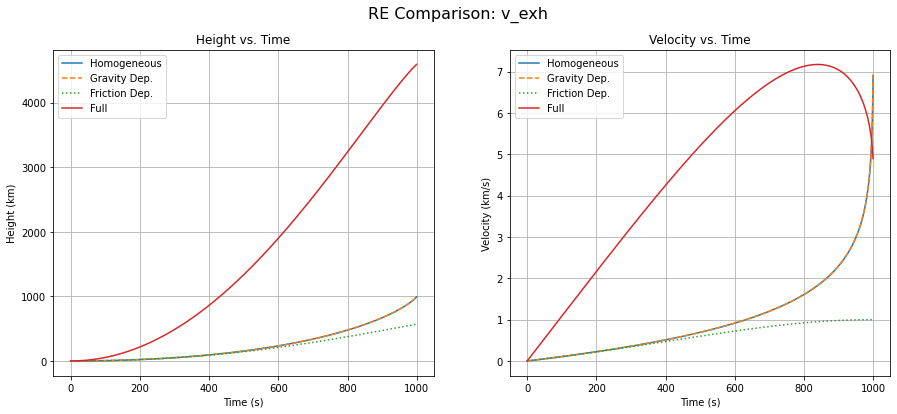

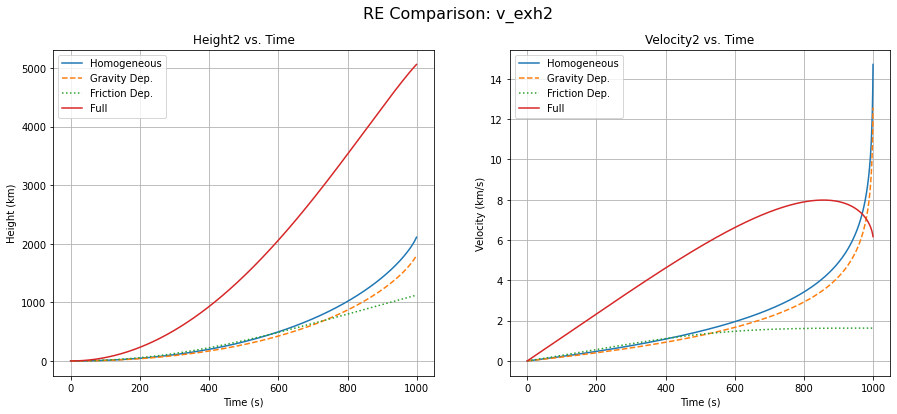

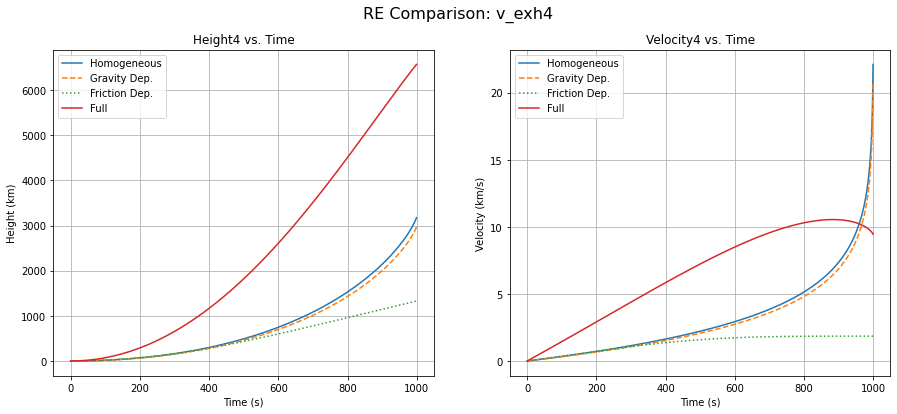

In [ ]:
b=50

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

# v_exh
def full_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol = integrate.odeint(full_RE, Y0, t)

# v_exh2
def full_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh2 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol2 = integrate.odeint(full_RE2, Y0, t)

# v_exh3
def full_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh3 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol3 = integrate.odeint(full_RE3, Y0, t)

# v_exh4
def full_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh4 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol4 = integrate.odeint(full_RE4, Y0, t)
#Big Plot
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, REsol[:,0], label = 'Homogeneous')
ax0.plot(t, Gsol[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax0.plot(t, Bsol[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax0.plot(t, Fsol[:,0], label = 'Full')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, REsol[:,1], label = 'Homogeneous')
ax1.plot(t, Gsol[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax1.plot(t, Bsol[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax1.plot(t, Fsol[:,1], label = 'Full')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

# v_exh2
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh2", fontsize = 16)

ax2,ax3 = axes[0],axes[1]

ax2.plot(t, REsol2[:,0], label = 'Homogeneous')
ax2.plot(t, Gsol2[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax2.plot(t, Bsol2[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax2.plot(t, Fsol2[:,0], label = 'Full')
ax2.set_title("Height2 vs. Time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Height (km)")
ax2.legend()
ax2.grid()

ax3.plot(t, REsol2[:,1], label = 'Homogeneous')
ax3.plot(t, Gsol2[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax3.plot(t, Bsol2[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax3.plot(t, Fsol2[:,1], label = 'Full')
ax3.set_title("Velocity2 vs. Time")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Velocity (km/s)")
ax3.legend()
ax3.grid()

# v_exh3
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh3", fontsize = 16)

ax4,ax5 = axes[0],axes[1]

ax4.plot(t, REsol3[:,0], label = 'Homogeneous')
ax4.plot(t, Gsol3[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax4.plot(t, Bsol3[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax4.plot(t, Fsol3[:,0], label = 'Full')
ax4.set_title("Height3 vs. Time")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Height (km)")
ax4.legend()
ax4.grid()

ax5.plot(t, REsol3[:,1], label = 'Homogeneous')
ax5.plot(t, Gsol3[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax5.plot(t, Bsol3[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax5.plot(t, Fsol3[:,1], label = 'Full')
ax5.set_title("Velocity3 vs. Time")
ax5.set_xlabel("Time (s)")
ax5.set_ylabel("Velocity (km/s)")
ax5.legend()
ax5.grid()

# v_exh4
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh4", fontsize = 16)

ax6,ax7 = axes[0],axes[1]

ax6.plot(t, REsol4[:,0], label = 'Homogeneous')
ax6.plot(t, Gsol4[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax6.plot(t, Bsol4[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax6.plot(t, Fsol4[:,0], label = 'Full')
ax6.set_title("Height4 vs. Time")
ax6.set_xlabel("Time (s)")
ax6.set_ylabel("Height (km)")
ax6.legend()
ax6.grid()

ax7.plot(t, REsol4[:,1], label = 'Homogeneous')
ax7.plot(t, Gsol4[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax7.plot(t, Bsol4[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax7.plot(t, Fsol4[:,1], label = 'Full')
ax7.set_title("Velocity4 vs. Time")
ax7.set_xlabel("Time (s)")
ax7.set_ylabel("Velocity (km/s)")
ax7.legend()
ax7.grid()

#fig.tight_layout()

All RE Comparison: b = 100

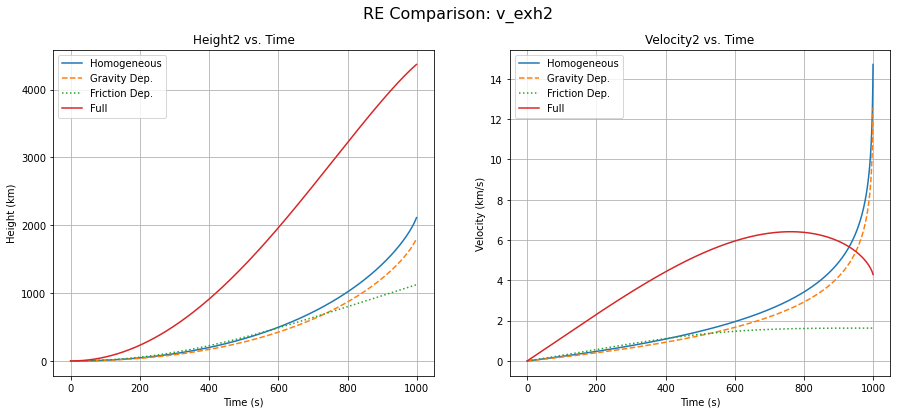

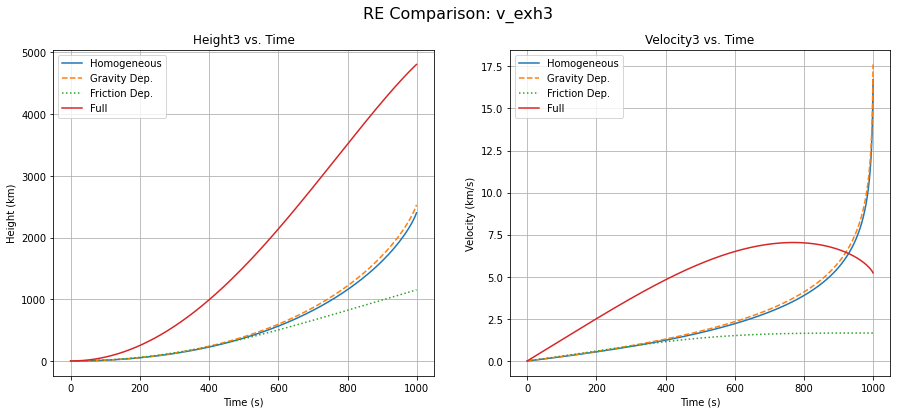

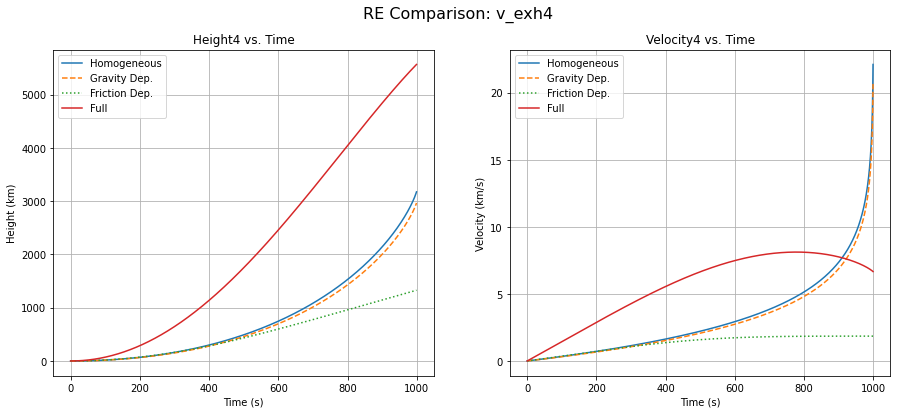

In [ ]:
b=100
# v_exh

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

# v_exh
def full_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol = integrate.odeint(full_RE, Y0, t)

# v_exh2
def full_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh2 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol2 = integrate.odeint(full_RE2, Y0, t)

# v_exh3
def full_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh3 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol3 = integrate.odeint(full_RE3, Y0, t)

# v_exh4
def full_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh4 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol4 = integrate.odeint(full_RE4, Y0, t)
#Big Plot
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, REsol[:,0], label = 'Homogeneous')
ax0.plot(t, Gsol[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax0.plot(t, Bsol[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax0.plot(t, Fsol[:,0], label = 'Full')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, REsol[:,1], label = 'Homogeneous')
ax1.plot(t, Gsol[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax1.plot(t, Bsol[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax1.plot(t, Fsol[:,1], label = 'Full')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

# v_exh2
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh2", fontsize = 16)

ax2,ax3 = axes[0],axes[1]

ax2.plot(t, REsol2[:,0], label = 'Homogeneous')
ax2.plot(t, Gsol2[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax2.plot(t, Bsol2[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax2.plot(t, Fsol2[:,0], label = 'Full')
ax2.set_title("Height2 vs. Time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Height (km)")
ax2.legend()
ax2.grid()

ax3.plot(t, REsol2[:,1], label = 'Homogeneous')
ax3.plot(t, Gsol2[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax3.plot(t, Bsol2[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax3.plot(t, Fsol2[:,1], label = 'Full')
ax3.set_title("Velocity2 vs. Time")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Velocity (km/s)")
ax3.legend()
ax3.grid()

# v_exh3
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh3", fontsize = 16)

ax4,ax5 = axes[0],axes[1]

ax4.plot(t, REsol3[:,0], label = 'Homogeneous')
ax4.plot(t, Gsol3[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax4.plot(t, Bsol3[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax4.plot(t, Fsol3[:,0], label = 'Full')
ax4.set_title("Height3 vs. Time")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Height (km)")
ax4.legend()
ax4.grid()

ax5.plot(t, REsol3[:,1], label = 'Homogeneous')
ax5.plot(t, Gsol3[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax5.plot(t, Bsol3[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax5.plot(t, Fsol3[:,1], label = 'Full')
ax5.set_title("Velocity3 vs. Time")
ax5.set_xlabel("Time (s)")
ax5.set_ylabel("Velocity (km/s)")
ax5.legend()
ax5.grid()

# v_exh4
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh4", fontsize = 16)

ax6,ax7 = axes[0],axes[1]

ax6.plot(t, REsol4[:,0], label = 'Homogeneous')
ax6.plot(t, Gsol4[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax6.plot(t, Bsol4[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax6.plot(t, Fsol4[:,0], label = 'Full')
ax6.set_title("Height4 vs. Time")
ax6.set_xlabel("Time (s)")
ax6.set_ylabel("Height (km)")
ax6.legend()
ax6.grid()

ax7.plot(t, REsol4[:,1], label = 'Homogeneous')
ax7.plot(t, Gsol4[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax7.plot(t, Bsol4[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax7.plot(t, Fsol4[:,1], label = 'Full')
ax7.set_title("Velocity4 vs. Time")
ax7.set_xlabel("Time (s)")
ax7.set_ylabel("Velocity (km/s)")
ax7.legend()
ax7.grid()

All RE Comparision: b = 200

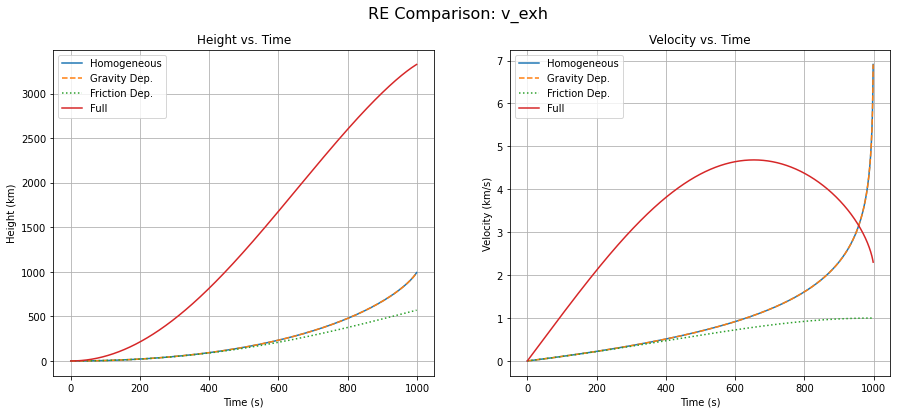

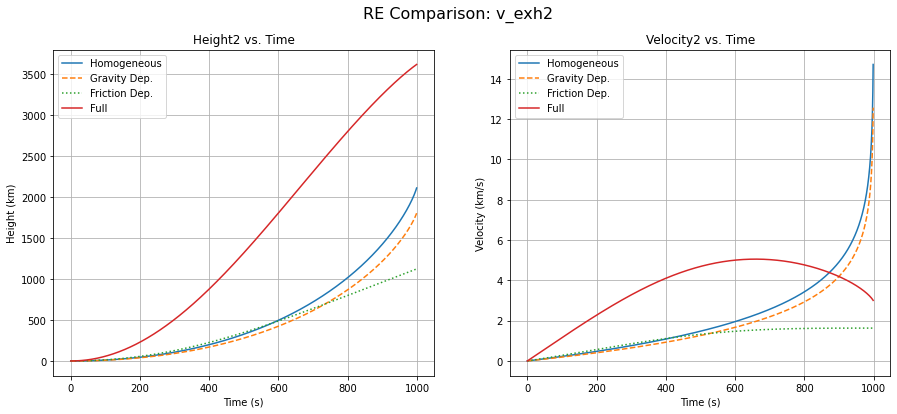

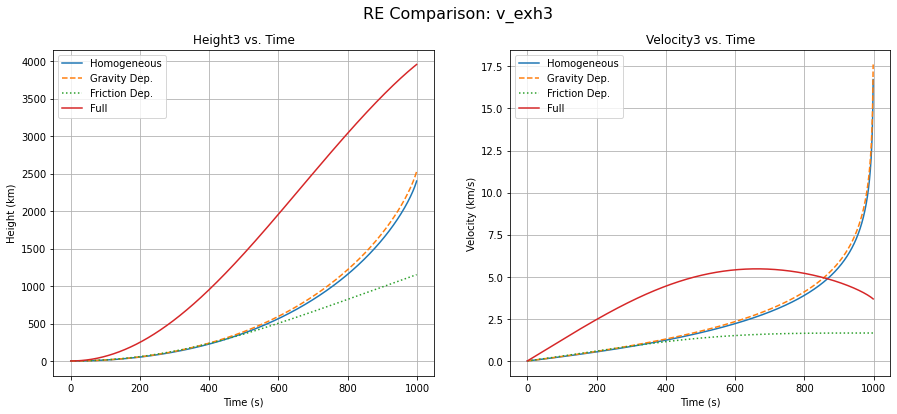

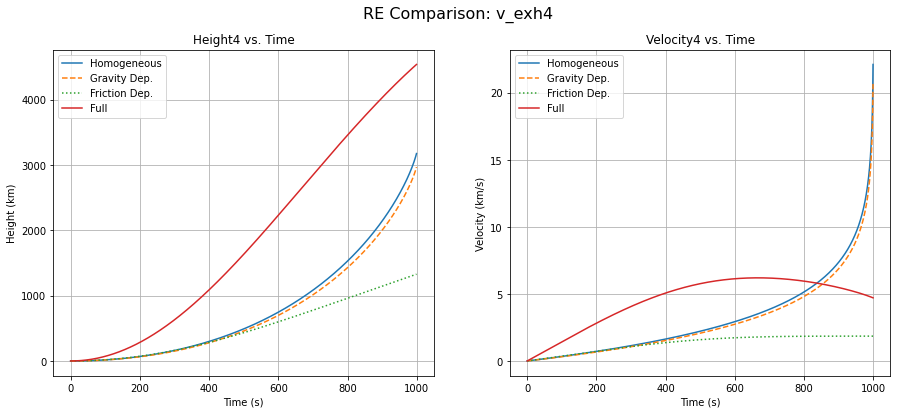

In [ ]:
b=200
# v_exh

def m(t):
  return m0 - dm * t

def dmdt(t):
  return -dm

# v_exh
def full_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol = integrate.odeint(full_RE, Y0, t)

# v_exh2
def full_RE2(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh2 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol2 = integrate.odeint(full_RE2, Y0, t)

# v_exh3
def full_RE3(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh3 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol3 = integrate.odeint(full_RE3, Y0, t)

# v_exh4
def full_RE4(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh4 * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol4 = integrate.odeint(full_RE4, Y0, t)
#Big Plot
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, REsol[:,0], label = 'Homogeneous')
ax0.plot(t, Gsol[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax0.plot(t, Bsol[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax0.plot(t, Fsol[:,0], label = 'Full')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, REsol[:,1], label = 'Homogeneous')
ax1.plot(t, Gsol[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax1.plot(t, Bsol[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax1.plot(t, Fsol[:,1], label = 'Full')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

# v_exh2
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh2", fontsize = 16)

ax2,ax3 = axes[0],axes[1]

ax2.plot(t, REsol2[:,0], label = 'Homogeneous')
ax2.plot(t, Gsol2[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax2.plot(t, Bsol2[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax2.plot(t, Fsol2[:,0], label = 'Full')
ax2.set_title("Height2 vs. Time")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Height (km)")
ax2.legend()
ax2.grid()

ax3.plot(t, REsol2[:,1], label = 'Homogeneous')
ax3.plot(t, Gsol2[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax3.plot(t, Bsol2[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax3.plot(t, Fsol2[:,1], label = 'Full')
ax3.set_title("Velocity2 vs. Time")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Velocity (km/s)")
ax3.legend()
ax3.grid()

# v_exh3
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh3", fontsize = 16)

ax4,ax5 = axes[0],axes[1]

ax4.plot(t, REsol3[:,0], label = 'Homogeneous')
ax4.plot(t, Gsol3[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax4.plot(t, Bsol3[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax4.plot(t, Fsol3[:,0], label = 'Full')
ax4.set_title("Height3 vs. Time")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Height (km)")
ax4.legend()
ax4.grid()

ax5.plot(t, REsol3[:,1], label = 'Homogeneous')
ax5.plot(t, Gsol3[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax5.plot(t, Bsol3[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax5.plot(t, Fsol3[:,1], label = 'Full')
ax5.set_title("Velocity3 vs. Time")
ax5.set_xlabel("Time (s)")
ax5.set_ylabel("Velocity (km/s)")
ax5.legend()
ax5.grid()

# v_exh4
fig, axes = plt.subplots(1,2, figsize = (15,6))
fig.suptitle("RE Comparison: v_exh4", fontsize = 16)

ax6,ax7 = axes[0],axes[1]

ax6.plot(t, REsol4[:,0], label = 'Homogeneous')
ax6.plot(t, Gsol4[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax6.plot(t, Bsol4[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax6.plot(t, Fsol4[:,0], label = 'Full')
ax6.set_title("Height4 vs. Time")
ax6.set_xlabel("Time (s)")
ax6.set_ylabel("Height (km)")
ax6.legend()
ax6.grid()

ax7.plot(t, REsol4[:,1], label = 'Homogeneous')
ax7.plot(t, Gsol4[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax7.plot(t, Bsol4[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax7.plot(t, Fsol4[:,1], label = 'Full')
ax7.set_title("Velocity4 vs. Time")
ax7.set_xlabel("Time (s)")
ax7.set_ylabel("Velocity (km/s)")
ax7.legend()
ax7.grid()

Using these plots, we can see how different terms affect the trajectory.

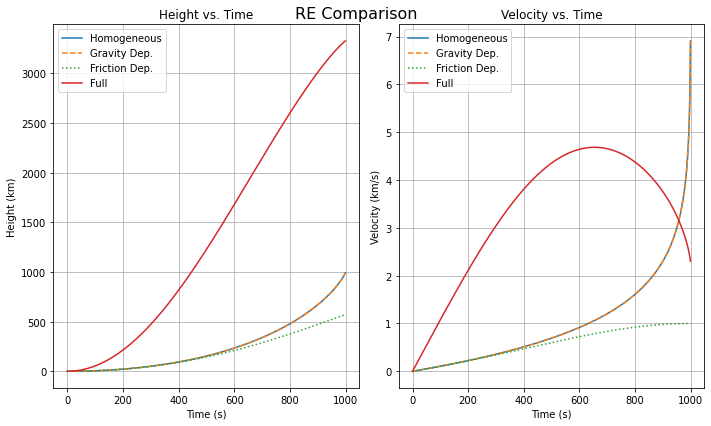

In [ ]:
# Initial Plotting Work

#Set sum(F) = m(t)*(dv/dt) + v_exh*(dm/dt) = -m(t)*g - b*v(t)**2
# RE incorporating both gravity and air resistance
# -> dv/dt = -(v_exh * dm/dt + m(t)*g)/m(t) = - v_exh * dm/dt / m(t) - g - b*v(t)**2 / m(t)

# Initialize constants
m0 = 1000000 #kg, inital rocket mass plus initial fuel mass
v_exh = 1 #km/s
#v_exh2 = 2.5 #km/s

g=-9.8/1000 #km/s^2 acceleration due to gravity
b = 200 #friction coefficient 

ejection_ratio = 1/1000 # Eject 1/1000 of the initial mass every second
dm = m0 * ejection_ratio  # Change in rocket mass per second
t = np.linspace(0, 1/ejection_ratio - 1, int(1/ejection_ratio * 100)) 
# Go just until were almost out of fuel and have enough steps for good resolution

# We can define m(t) in a variety of ways, corresponding to different
# fuel ejection rates. 
def m(t): # Linear expulsion of fuel so mass decreases with time
  return m0 - dm * t

def dmdt(t): # Manually take the derivative
  return -dm

def full_RE(Y, t):
  y = Y[0]
  v = Y[1]
  dydt = v
  dvdt = -((v_exh * dmdt(t)) + (m(t)*g) + (b*(dydt)**2))/m(t)
  return [dydt,dvdt]

Y0 = [0,0]
Fsol = integrate.odeint(full_RE, Y0, t)

#Big Plot
fig, axes = plt.subplots(1,2, figsize = (10,6))
fig.suptitle("RE Comparison", fontsize = 16)

ax0,ax1 = axes[0],axes[1]
ax0.plot(t, REsol[:,0], label = 'Homogeneous')
ax0.plot(t, Gsol[:,0], label = 'Gravity Dep.', linestyle = 'dashed')
ax0.plot(t, Bsol[:,0], label = 'Friction Dep.', linestyle = 'dotted')
ax0.plot(t, Fsol[:,0], label = 'Full')
ax0.set_title("Height vs. Time")
ax0.set_xlabel("Time (s)")
ax0.set_ylabel("Height (km)")
ax0.legend()
ax0.grid()

ax1.plot(t, REsol[:,1], label = 'Homogeneous')
ax1.plot(t, Gsol[:,1], label = 'Gravity Dep.', linestyle = 'dashed')
ax1.plot(t, Bsol[:,1], label = 'Friction Dep.', linestyle = 'dotted')
ax1.plot(t, Fsol[:,1], label = 'Full')
ax1.set_title("Velocity vs. Time")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Velocity (km/s)")
ax1.legend()
ax1.grid()

fig.tight_layout()

In [ ]:
#Extra Notes

#From formula in LaTeX report
# set Sum(F) = m * (dv/dt) - (dv_exh/dt) = 0 and solve

#To determine the following values of dv/dt, dv_exh/dt, etc. we will need to compute
#the derivatives using from scipy.misc import derivative and sets of mock data/our
#eqautions that we will calculate on.

def F(m0,dvdt,v_exh,dmdt):
  return m0 * (dvdt) - (v_exh) * dmdt 

# We can solve this exactly for the change in velocity 
# delta_v = v_exh*np.log(m_i/m_f)

#other eqautions that produce the above result (which is defined later here) come from:
def momentum(m,v):
  return m*v

def thrust(v_exh,dmdt):
  return v_exh*(dmdt)

def F_drag(d_coef,rho,rel_v,A,): #rel_v=relative velocity of rocket to air,
  return (d_coef*A*rho*rel_v**2)/2    #A=cross-sectional area of rocket, rho=density of air(?)

#solving force equation exactly to get:
def delta_v(v_exh,m_i,m_f):
  return v_exh*np.log(m_i/m_f)

mass_ratios = np.linspace(1,100,1000)
delta_vs = v_exh*np.log(mass_ratios)